<a href="https://colab.research.google.com/github/Ehsan-data/JAVA/blob/master/Model.2%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


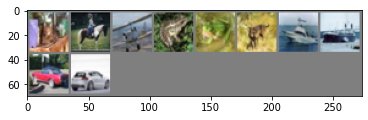

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1/20], Step [2000/5000], Loss: 2.2637
Epoch [1/20], Step [4000/5000], Loss: 1.9672
Epoch [2/20], Step [2000/5000], Loss: 1.5578
Epoch [2/20], Step [4000/5000], Loss: 1.1976
Epoch [3/20], Step [2000/5000], Loss: 1.1270
Epoch [3/20], Step [4000/5000], Loss: 0.9546
Epoch [4/20], Step [2000/5000], Loss: 0.9351
Epoch [4/20], Step [4000/5000], Loss: 0.5662
Epoch [5/20], Step [2000/5000], Loss: 1.5362
Epoch [5/20], Step [4000/5000], Loss: 0.8854
Epoch [6/20], Step [2000/5000], Loss: 0.8042
Epoch [6/20], Step [4000/5000], Loss: 1.1067
Epoch [7/20], Step [2000/5000], Loss: 0.5189
Epoch [7/20], Step [4000/5000], Loss: 0.6090
Epoch [8/20], Step [2000/5000], Loss: 1.2574
Epoch [8/20], Step [4000/5000], Loss: 0.8753
Epoch [9/20], Step [2000/5000], Loss: 0.7134
Epoch [9/20], Step [4000/5000], Loss: 0.8139
Epoch [10/20], Step [2000/5000], Loss: 1.2401
Epoch [10/20], Step [4000/5000], Loss: 0.4798
Epoch [11/20], Step [2000/5000], Loss: 1.1969
Epoch [11/20], Step [4000/5000], Loss: 0.3687
Epoch 

In [1]:

# Importing the pytorch moduels
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 20
batch_size = 10
learning_rate = 0.01

# We transform images 
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#loading dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(image):
    image = image / 2 + 0.5  # unnormalize
    arr_image = image.numpy()
    plt.imshow(np.transpose(arr_image, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 16 * 5 * 5)            
        x = F.relu(self.fc1(x))               
        x = F.relu(self.fc2(x))               
        x = self.fc3(x)                       
        return x


model_1 = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model_1(images)
        loss = criterion(outputs, labels)

        # Backward and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model_1.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model_1(images)

        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')